<center>

**CIFRADOS DE FLUJO**

</center>

<p align="center">
    <img src="https://logowik.com/content/uploads/images/escudo-de-la-universidad-nacional-de-colombia-20163327.logowik.com.webp" width="400">
</p>

# **🔐Cifrado de Vigenere🔐**

<center>

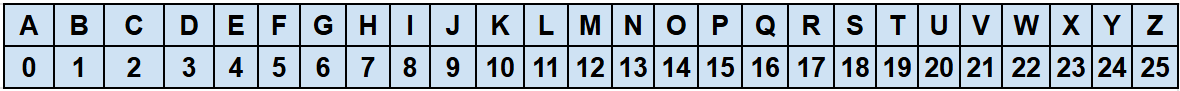

</center>

<div align="justify">

El cifrado de Vigenère es un método de sustitución **polialfabética** en el que cada símbolo del mensaje claro se combina mediante suma modular con un símbolo de clave tomado de forma cíclica. Definido sobre el anillo $\mathbb{Z}_{26}$, emplea una clave de longitud $m$ que genera $m$ alfabetos de César distintos cuyas rotaciones sucesivas aseguran que una misma letra clara adopte múltiples valores cifrados. Su espacio de claves crece exponencialmente como $26^m$, y la inversión de la transformación se realiza mediante resta modular.


Formalmente, sea el alfabeto  
  $$\mathcal A = \{A,B,C,\dots,Z\}$$  
  y la identificación  
  $$A\mapsto 0,\;B\mapsto1,\;\dots,\;Z\mapsto25$$  
  en el anillo cíclico $\mathbb{Z}_{26}$.

**Texto claro**  
  $$P=P_1P_2\cdots P_n,\quad P_i\in\mathcal A,\quad p_i=[P_i]\in\mathbb{Z}_{26}.$$

**Clave**  
  $$K=K_1K_2\cdots K_m,\quad K_j\in\mathcal A,\quad k_j=[K_j]\in\mathbb{Z}_{26}.$$  
  Se extiende cíclicamente:  
  $$k_{i}^{*}=k_{((i-1)\bmod m)+1},\quad i=1,\dots,n.$$

**Encriptación**  
  Para cada posición $i$:  
  $$
    c_i \;=\;(p_i + k_{i}^{*})\bmod26,
    \quad
    C_i = \text{Let}(c_i).
  $$

**Desencriptación**  
  $$
    p_i \;=\;(c_i - k_{i}^{*})\bmod26,
    \quad
    P_i = \text{Let}(p_i).
  $$

---

**Estructura Algebraica**

Cada función $E_K:\,\mathbb{Z}_{26}^n\to\mathbb{Z}_{26}^n$ dada por

  $$
    E_K(P)_i = (p_i + k_{i}^{*})\bmod26
  $$
  es invertible, con inversa $D_K$ definida por resta modular.

La composición de cifrados con claves $K^{(1)},K^{(2)}$ satisface
  
  $$
    E_{K^{(1)}} \circ E_{K^{(2)}} \;=\;
    E_{K^{(1)} + K^{(2)}},
  $$

donde la suma $K^{(1)}+K^{(2)}$ es vectorial módulo 26.

---

**Propiedades Criptográficas**

<center>

| Propiedad                   | Vigenère                                |
|-----------------------------|-----------------------------------------|
| Tipo                        | Sustitución **polialfabética**          |
| Tamaño de clave mínima      | $m \ge 1$                               |
| Espacio de claves           | $26^m$                                  |
| Complejidad (cifrado)       | $O(n)$                                  |
| Resistencia a fuerza bruta  | Exponencial en $m$                      |
| Vulnerabilidad principal    | Repetición de clave, análisis de frecuencias por subcifras César |

</center>

---

**Criptoanálisis Básico**

1. **Determinación de $m$**  
   - Métodos de coincidencia de n-gramas (Kasiski, Friedman).
2. **División en subcifras**  
   - Para cada offset $j=1,\dots,m$, extraer la subcadena $\{C_j,C_{j+m},C_{j+2m},\dots\}$, equivalente a César con desplazamiento $k_j$.
3. **Recuperación de $k_j$**  
   - Análisis de frecuencia o prueba **χ²** (aunque aquí no se detalla).

---

**Ejemplo**

<center>

| $i$ | $P_i$ | $p_i$ | $K_{i}^{*}$ | $k_i^{*}$ | $p_i+k_i^{*}$ | $\bmod26$ | $C_i$ |
|:---:|:-----:|:-----:|:-----------:|:---------:|:-------------:|:---------:|:-----:|
|  1  |  A    |   0   |     L       |    11     |      0+11     |    11     |   L   |
|  2  |  T    |  19   |     E       |     4     |     19+4      |    23     |   X   |
|  3  |  T    |  19   |     M       |    12     |     19+12     |     5     |   F   |
|  4  |  A    |   0   |     O       |    14     |      0+14     |    14     |   O   |
|  5  |  C    |   2   |     N       |    13     |      2+13     |    15     |   P   |
| …   |  …    |  …    |     …       |    …      |      …        |    …      |   …   |

</center>

Clave: **LEMON** → índices $(11,4,12,14,13)$ repetidos.



</div>

**📥Importaciones📦**

In [1]:

import ipywidgets as wd, string, numpy as np
from IPython.display import display, HTML

**👨‍💻Implementación👩‍💻**

In [2]:

HTML(r"""
<link href="https://fonts.googleapis.com/css2?family=Poppins:wght@400;700&family=Fira+Code&display=swap" rel="stylesheet">
<style>
:root{--a1:#7c4dff;--a2:#ff6ec4;--txt:#222}
body,.jp-Notebook{background:#303030!important;color:var(--txt)}
@media (prefers-color-scheme:light){body,.jp-Notebook{background:#fafafa!important;--txt:#222}}

.v-card{
  backdrop-filter:blur(14px) saturate(160%);-webkit-backdrop-filter:blur(14px) saturate(160%);
  background:rgba(255,255,255,.07);border:1.6px solid rgba(255,255,255,.25);
  border-radius:24px;box-shadow:0 8px 22px rgba(0,0,0,.25);
  padding:32px;max-width:940px;margin:32px auto;font-family:'Poppins',sans-serif
}
.v-title{font-size:2.2rem;font-weight:700;background:linear-gradient(90deg,var(--a1),var(--a2));
  -webkit-background-clip:text;color:transparent;margin-bottom:16px}
.v-btn{background:linear-gradient(135deg,var(--a1),var(--a2));color:#fff;border:none;border-radius:24px;
  padding:10px 28px;font-weight:600;cursor:pointer;font-family:'Poppins';
  transition:.15s transform,.15s box-shadow}
.v-btn:hover{transform:translateY(-2px);box-shadow:0 6px 18px rgba(0,0,0,.28)}
textarea,input{width:100%;box-sizing:border-box;border:none;border-radius:14px;
  padding:12px 16px;font-family:'Fira Code',monospace;background:rgba(255,255,255,.12);color:#eaeaea}
textarea:focus,input:focus{outline:none;box-shadow:0 0 0 2px var(--a1)}
.toggle-buttons .widget-toggle-button{}
/* Tabla */
.tbl{width:100%;border-collapse:collapse;font-family:'Fira Code';font-size:.85rem;margin-top:20px}
.tbl th{padding:6px;border-bottom:1px solid rgba(255,255,255,.25);color:#e0e0e0}
.tbl td{padding:4px 6px;text-align:center}
td.p{color:#4cd137;font-weight:600}   /* plaintext */
td.k{color:#fbc02d;font-weight:600}   /* key */
td.c{color:#ff6584;font-weight:600}   /* cipher */
</style>
""")

**👨‍💻Implementación👩‍💻**

In [3]:

ABC = string.ascii_uppercase
IDX = {c:i for i,c in enumerate(ABC)}
def clean(s): return ''.join(ch.upper() for ch in s if ch.isalpha())

def vig(text,key,mode='enc'):
    t=clean(text); k=clean(key)
    if not k: raise ValueError("Clave vacía")
    res=[]
    for i,ch in enumerate(t):
        off = IDX[k[i%len(k)]]
        if mode=='dec': off = -off
        res.append(ABC[(IDX[ch] + off) % 26])
    return ''.join(res)

def build_table(pt,key,ct,mode):
    rows=[]
    for i,(p,k,c) in enumerate(zip(pt,key,ct),1):
        pidx, kidx, cidx = IDX[p], IDX[k], IDX[c]
        sign = '+' if mode=='enc' else '−'
        rows.append(
          f"<tr><td>{i}</td>"
          f"<td class='p'>{p}</td><td>{pidx}</td>"
          f"<td>{sign}</td>"
          f"<td class='k'>{k}</td><td>{kidx}</td>"
          f"<td>mod26</td>"
          f"<td>{cidx}</td><td class='c'>{c}</td></tr>")
    head = ("<tr><th>pos</th><th>P</th><th>Pidx</th><th></th>"
            "<th>K</th><th>Kidx</th><th></th><th>Cidx</th><th>C</th></tr>")
    return f"<table class='tbl'>{head}{''.join(rows)}</table>"

**👨‍💻Implementación👩‍💻**

In [4]:

cipher_in = wd.Textarea(placeholder='Texto (c/d descifrar) …',layout={'height':'100px'})
key_in    = wd.Text(placeholder='Clave…')
mode_sel  = wd.ToggleButtons(options=[('Cifrar','enc'),('Descifrar','dec')],value='enc',
                             style={'button_width':'110px'})
run_btn   = wd.Button(description='Ejecutar',_dom_classes=['v-btn'])
result_out= wd.Textarea(disabled=True,layout={'height':'100px'})
tbl_html  = wd.HTML()

def run(_):
    try:
        mode=mode_sel.value
        if mode=='enc':
            pt = cipher_in.value
            ct = vig(pt,key_in.value,'enc')
            krep=(clean(key_in.value)*((len(clean(pt))//len(clean(key_in.value))+1)))[:len(clean(pt))]
            tbl_html.value = build_table(clean(pt),krep,ct,'enc')
            result_out.value = ct
        else:
            ct = cipher_in.value
            pt = vig(ct,key_in.value,'dec')
            krep=(clean(key_in.value)*((len(clean(ct))//len(clean(key_in.value))+1)))[:len(clean(ct))]
            tbl_html.value = build_table(pt,krep,clean(ct),'dec')
            result_out.value = pt
    except Exception as e:
        result_out.value=f'⛔ {e}'
run_btn.on_click(run)

**👨‍💻Implementación👩‍💻**

In [5]:

card = wd.VBox([
    wd.HTML("<div class='v-title'>Vigenère Visualizer ✨</div>"),
    wd.HTML("<b>Texto:</b>"), cipher_in,
    wd.HTML("<b>Clave:</b>"), key_in,
    wd.HBox([mode_sel, run_btn],layout={'margin':'18px 0'}),
    wd.HTML("<b>Resultado:</b>"), result_out,
    tbl_html
], _dom_classes=['v-card'])

display(card)

<div align="justify">




</div>